# <center>  Statistical Analysis for vehicle's fuel consumption</center>

*<center>"Ask questions,the data will confess"</center>* 

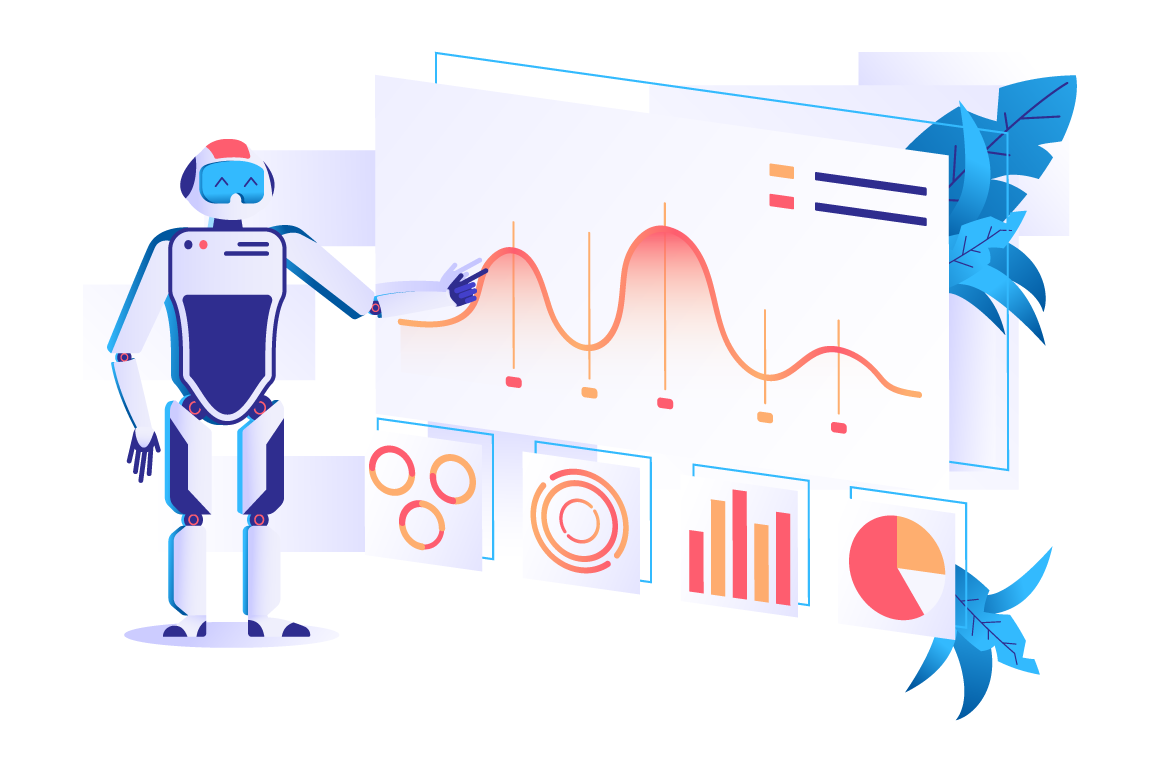

The kernel focuses on Exploratory Data Anaysis using classical statistical techniques. I have used quantitative techniques as well as graphical techniques to perform various tests.

## Descriptive Statistics

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis. 


###  Measures of center
Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.



In [1]:
#Importing necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from __future__ import division
#turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
sns.set_palette(['#00A99D','#B61298','#76620C','#095C57'])
np.version.full_version

'1.16.5'

In [2]:
# loading and reading data
df= pd.read_csv("test_fuel.csv",names=['fuel'])
df.head()

   fuel
0  0.00
1  1.00
2  1.20
3  2.31
4  2.34

## Histogram
How many times each value appears in dataset. This description is called the distribution of variable
Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
Frequency = number of times each value appears

(array([ 2.,  5.,  7., 13., 20., 39., 23., 10.,  4.,  2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

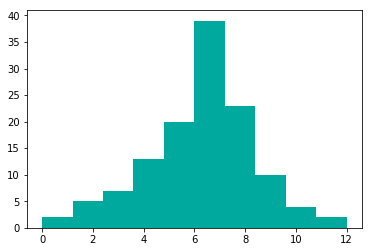

In [3]:
plt.hist(df["fuel"])

The mean is simply an average: the sum of the values divided by the total number of records. We can use df.mean() to get the mean of each column in a data frame:


In [58]:
 # Get the mean of each column
x_bar=df["fuel"].mean()
x_bar         

6.198529000000003

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it. We can get the median using the df.median() function:

In [44]:
# Get the median of each column
x_median=df["fuel"].median()          
x_median

6.32

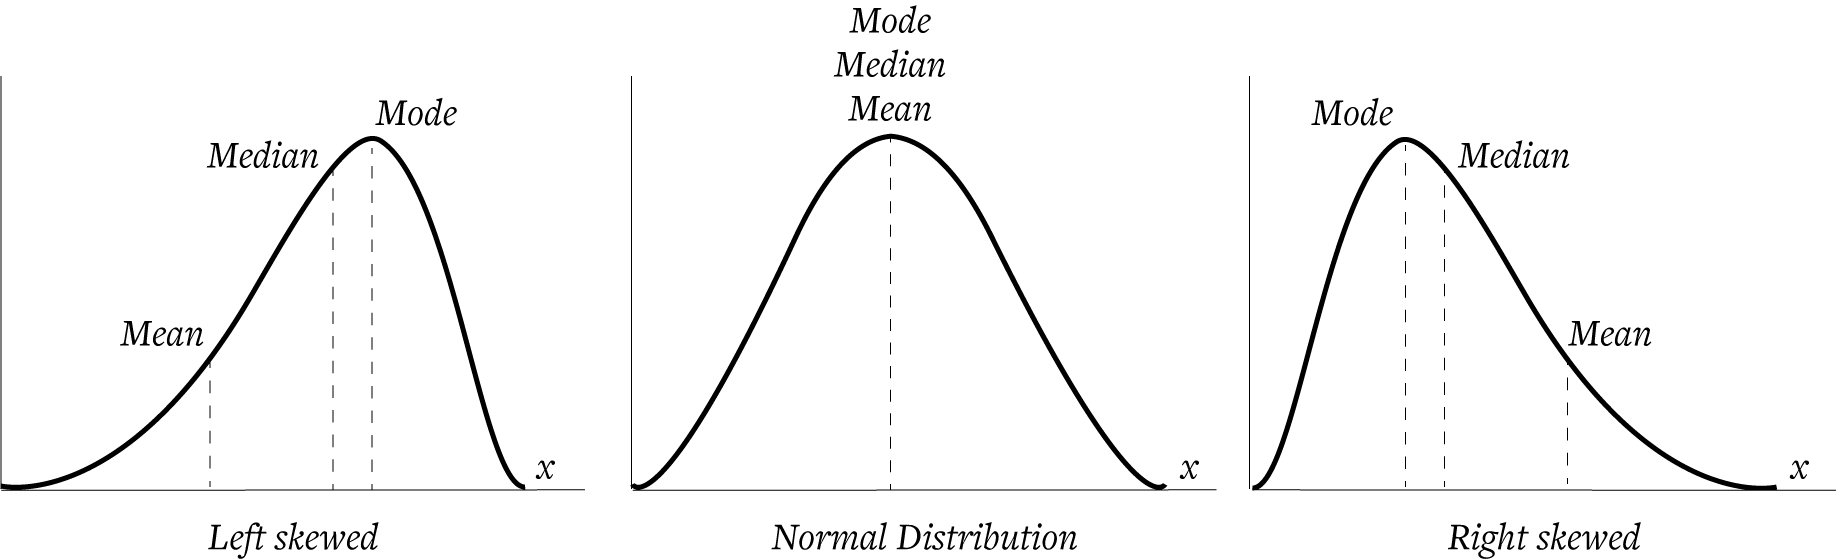

### Note:
Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

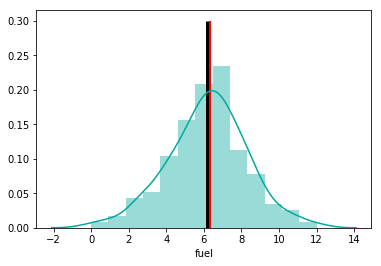

In [45]:
sns.distplot(df.fuel)

# Plot black line at mean
plt.vlines(df.mean(),    
           ymin=0, 
           ymax=0.3,
           linewidth=5.0);
# Plot red line at median
plt.vlines(df.median(),   
           ymin=0, 
           ymax=0.3, 
           linewidth=2.0,
           color="red");

In the plot above the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean.

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

The mode of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. Find the mode with df.mode():

In [46]:
# Get the mode of each column
x_mode= df.mode()         
x_mode

   fuel
0   5.0
1   6.0

## Measures of Spread
Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [47]:
max(df["fuel"]) - min(df["fuel"])

12.0

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

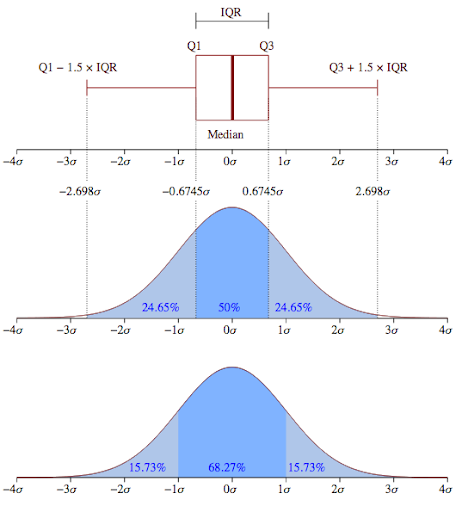

In [48]:
five_num = [df["fuel"].quantile(0),   
            df["fuel"].quantile(0.25),
            df["fuel"].quantile(0.50),
            df["fuel"].quantile(0.75),
            df["fuel"].quantile(1)]

five_num

[0.0, 5.0, 6.32, 7.34, 12.0]

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by df.describe():

In [49]:
df["fuel"].describe()

count    125.000000
mean       6.198529
std        2.119095
min        0.000000
25%        5.000000
50%        6.320000
75%        7.340000
max       12.000000
Name: fuel, dtype: float64

Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [17]:
df["fuel"].quantile(0.75) - df["fuel"].quantile(0.25)

2.34

The boxplots are visual representations of the five number summary and IQR:

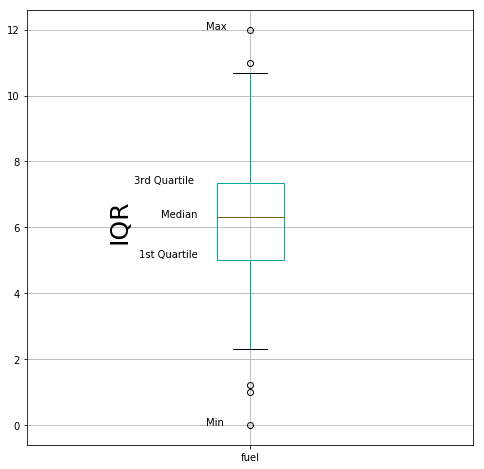

In [50]:
df.boxplot(column="fuel",
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=7.34, s="3rd Quartile")
plt.text(x=0.8, y=6.3, s="Median")
plt.text(x=0.75, y=5.1, s="1st Quartile")
plt.text(x=0.9, y=0, s="Min")
plt.text(x=0.9, y=12, s="Max")
plt.text(x=0.68, y=6.3, s="IQR", rotation=90, size=25);

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. 

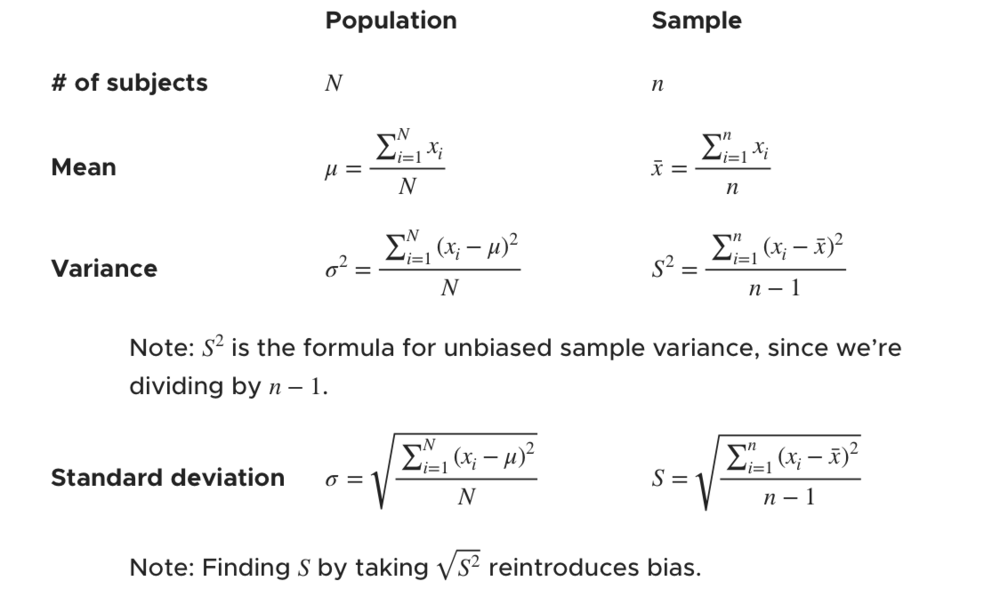

We used df.var() to check variance:

In [51]:
df["fuel"].var()

4.490564127176412

The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. we used df.std() to check the standard deviation:

In [20]:
df["scores"].std()

2.1190951198982106

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:



In [52]:
abs_median_devs = abs(df["fuel"] - df["fuel"].median())

abs_median_devs.median() * 1.4826

1.9570320000000003

## Skewness and Kurtosis
Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures how much data is in the tails of a distribution v.s. the center. We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [53]:
# Check skewness
df["fuel"].skew()  

-0.164897326648447

In [54]:
# Check kurtosis
df["fuel"].kurt()  

0.3646297648636736

For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution and < 0 means that there is more weight in the left tail of the distribution.

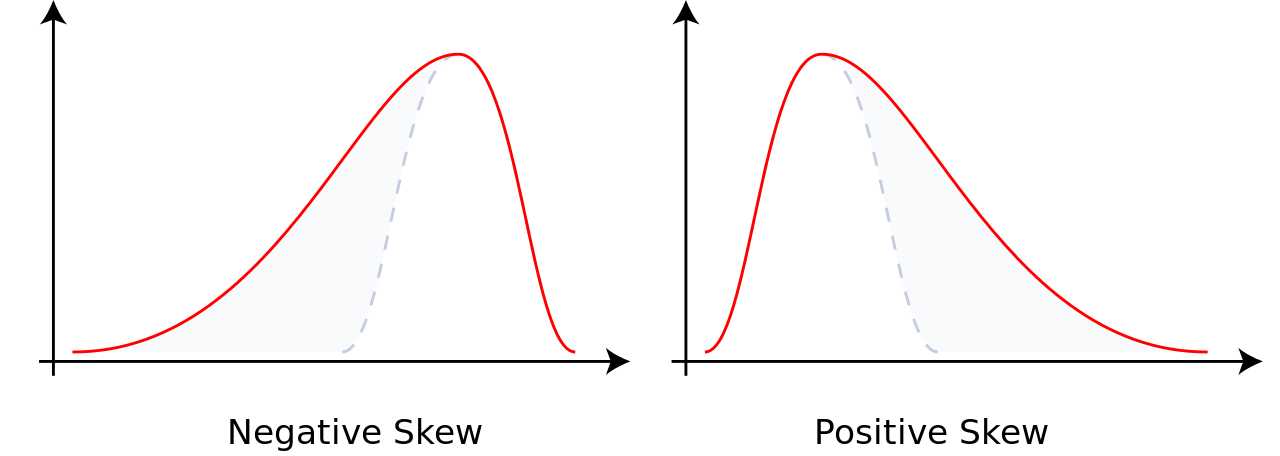

# Conformity to Normale distribution


### QQ plot
In a QQ plot, a perfect match for the normal distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. It can be used to check if a distribution is normal or not.

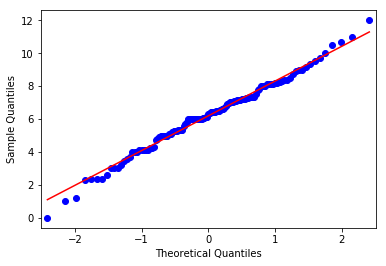

In [55]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df["fuel"], line='s');

Running the example creates the QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution

## Hypothesis Testing
Point estimates and confidence intervals are basic inference tools that act as the foundation for another inference technique: statistical hypothesis testing. Statistical hypothesis testing is a framework for determining whether observed data deviates from what is expected. Python's scipy.stats library contains an array of functions that make it easy to carry out hypothesis tests.

### Hypothesis Testing Basics
Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. The exact form of the null hypothesis varies from one type test to another: if you are testing whether groups differ, the null hypothesis states that the groups are the same. For instance, if you wanted to test whether the average age of voters in your home state differs from the national average, the null hypothesis would be that there is no difference between the average ages.

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. Continuing with the example above, the alternative hypothesis would be that the average age of voters in your state does in fact differ from the national average.

Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α.). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

### The Shapiro-Wilk
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

In [25]:
stat, p = stats.shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.733
Sample looks Gaussian (fail to reject H0)


The data is likely drawn from a Gaussian distribution.

### The D’Agostino’s K^2
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution. Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

In [26]:
stat, p = stats.normaltest(df["scores"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1.504, p=0.471
Sample looks Gaussian (fail to reject H0)


The data is likely drawn from a Gaussian distribution.

### Anderson-Darling Test
Anderson-Darling Test (Theodore Anderson and Donald Darling) is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

In [27]:
result = stats.anderson(df["scores"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.406
15.000: 0.559, data looks normal (fail to reject H0)
10.000: 0.637, data looks normal (fail to reject H0)
5.000: 0.764, data looks normal (fail to reject H0)
2.500: 0.891, data looks normal (fail to reject H0)
1.000: 1.060, data looks normal (fail to reject H0)


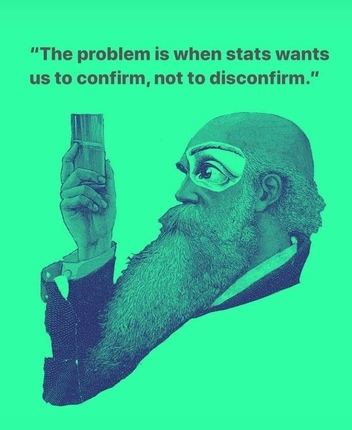

## Confidence Intervals
A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.
If you know the standard deviation of the population, the margin of error is equal to:

                                                        z*σ/√n
 


Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).



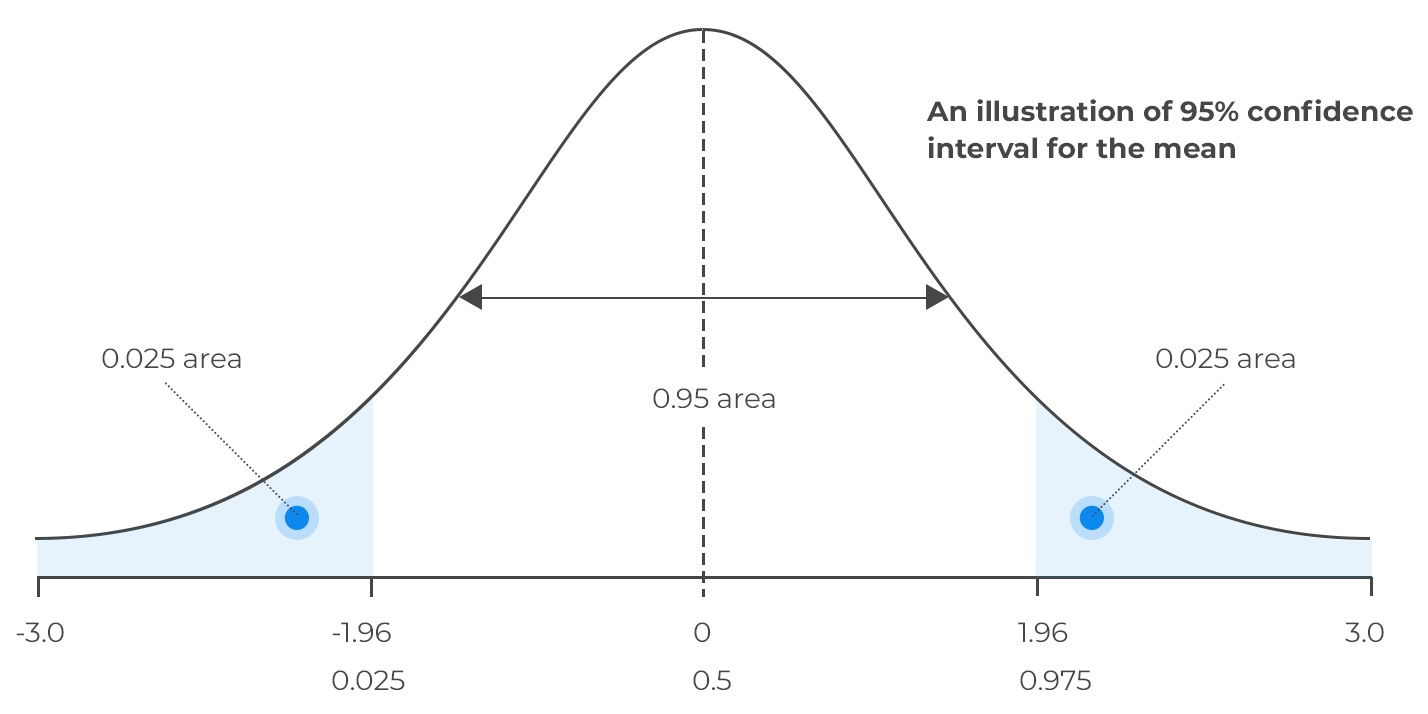

Let's calculate a 95% confidence for our mean point estimate:

In [59]:
# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.975)  
# Check the z-critical value
print("z-critical value:")             
print(z_critical)                        
# Get the population standard deviation
pop_stdev = df.fuel.std()  
n=len(df)
margin_of_error = z_critical * (pop_stdev/math.sqrt(n))

confidence_interval = (x_bar - margin_of_error,
                       x_bar + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(5.82704207235668, 6.570015927643326)


## Relationship Between Variables
We can say that two variables are related with each other, if one of them gives information about others
For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
Scatter Plot
Simplest way to check relationship between two variables
Lets look at relationship between radius mean and area mean
In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

In [105]:
#loading data
data=pd.read_excel('data.xlsx')
#display the first 5 rows
data.head()


   Fuel  Max_Speed  Mileage   rapport
0     2       0.00        0 -0.165573
1     4       4.82        0  0.000000
2     6       5.44        0  0.000000
3     6       9.26        1  0.000000
4     4      77.36       21  0.000000

In [106]:
columns=['Max_Speed','Mileage','rapport']
label= data['Fuel'].values
variables= data[list(columns)].values

We can say that two variables are related with each other, if one of them gives information about others
For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
- Scatter Plot
Simplest way to check relationship between two variables
Lets look at relationship between radius mean and area mean
In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

<Figure size 1080x720 with 0 Axes>

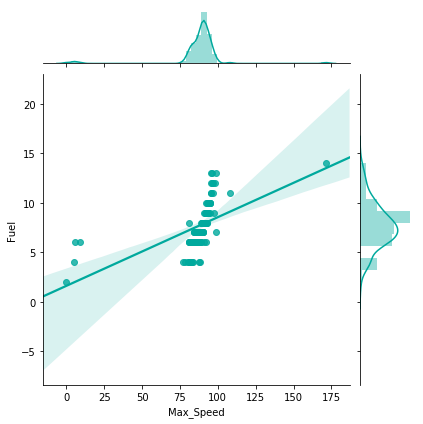

In [108]:
plt.figure(figsize = (15,10))
sns.jointplot(data.Max_Speed,data.Fuel,kind="regg")
plt.show()

<Figure size 1080x720 with 0 Axes>

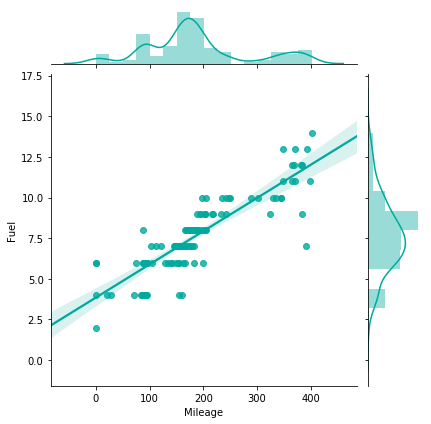

In [109]:
plt.figure(figsize = (15,10))
sns.jointplot(data.Mileage,data.Fuel,kind="regg")
plt.show()

<Figure size 1080x720 with 0 Axes>

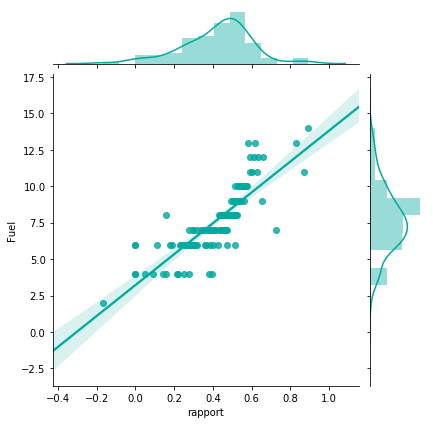

In [110]:
plt.figure(figsize = (15,10))
sns.jointplot(data.rapport,data.Fuel,kind="regg")
plt.show()

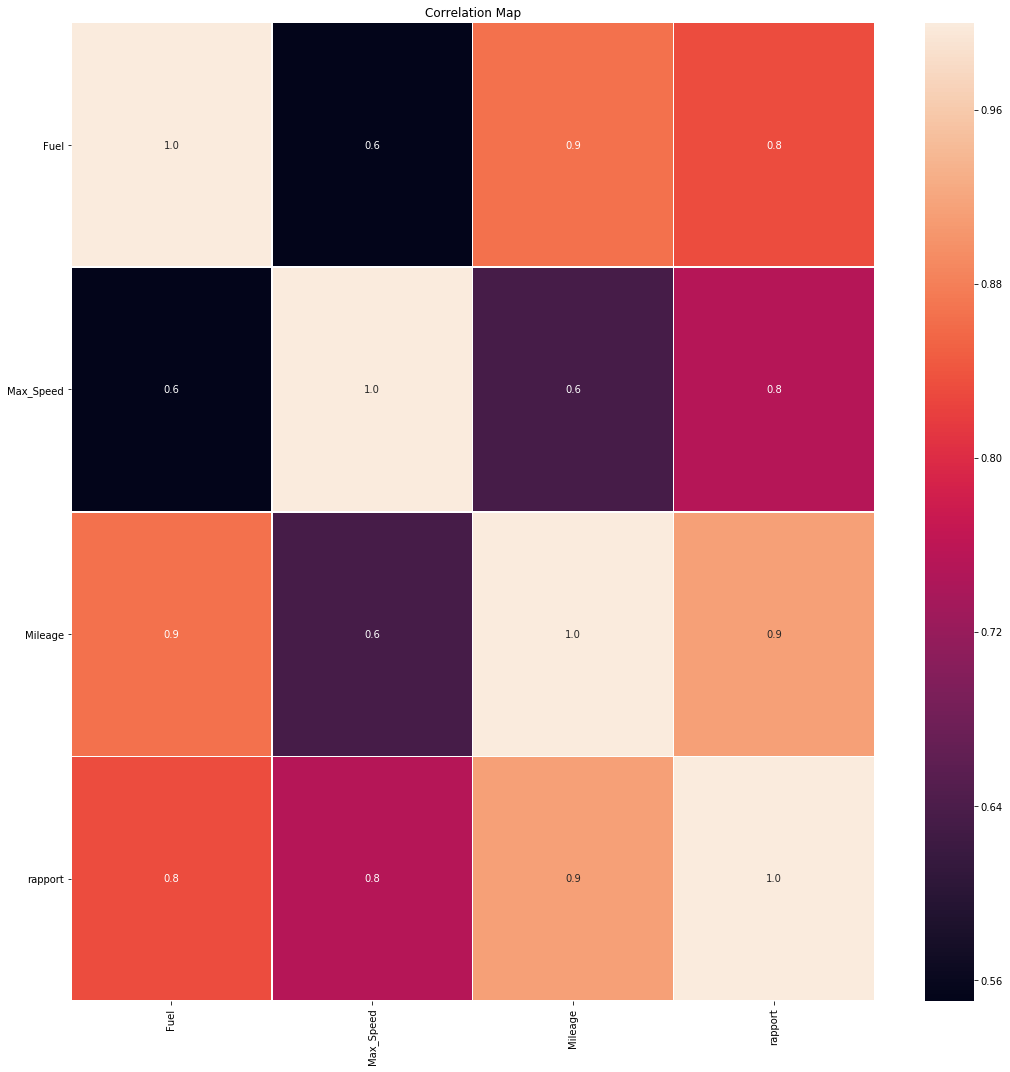

In [107]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

* A large positive value (near to 1.0) indicates a strong positive correlation, i.e., if the value of one of the variables increases, the value of the other variable increases as well.
* A large negative value (near to -1.0) indicates a strong negative correlation, i.e., the value of one variable decreases with the other’s increasing and vice-versa.
* A value near to 0 (both positive or negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other.


### Note: More details and interpretations are specified in our report.